# Linear regression (predicting a continuous value):

*** Question:**
>     CalCOFI data: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [5]:
bottle = pd.read_csv("../input/calcofi/bottle.csv")
bottle.head(2)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [7]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
bottle_df = bottle[['T_degC','Salnty']]

# And called again
bottle_df.columns = ['Temperature', 'Salinity']

In [8]:
bottle_df = bottle_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


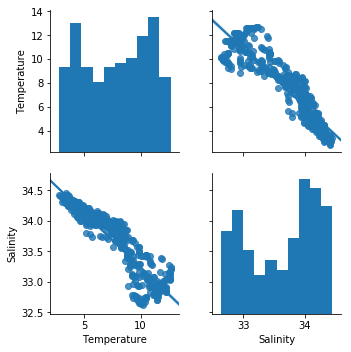

In [9]:
# See picture with scatter or plot method

# sns.lmplot(x="Salinity", y="Temperature", data=bottle_df, order=2, ci=None);
sns.pairplot(bottle_df, kind="reg")

In [10]:
# see how many null values we have

bottle_df.isnull().sum()

Temperature    1
Salinity       6
dtype: int64

In [11]:
# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
#bottle_df.isnull().sum()

In [12]:
# Features chose

X = np.array(bottle_df['Salinity']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)

In [13]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 1.Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))


Linear Regression Model Accuracy Score: 82.7%


In [16]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.827


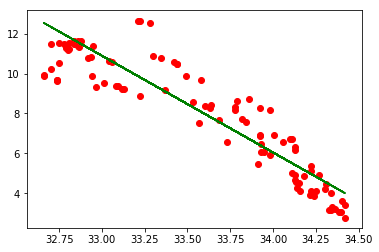

In [17]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

# 2.Multiple Linear Regression

In [18]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[-4.84772527]])

In [19]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 1.1
R2 Score for Test set: 0.853


## 2.1.Multiple Linear Regression Model Tunning

In [20]:
# cross validation method is giving better and clear result

cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

0.7897720931156469

In [21]:
mlin_df.score(X_train, y_train)      # r2 value

0.8534867439916551

In [22]:
np.sqrt(-cross_val_score(mlin_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

1.1221107797911745

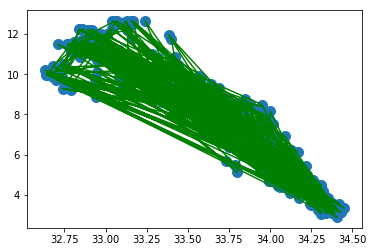

In [23]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

* This was just for train set and you can also do for test set.

# 3.Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)


In [25]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.8
R2 Score for Test set: 0.92


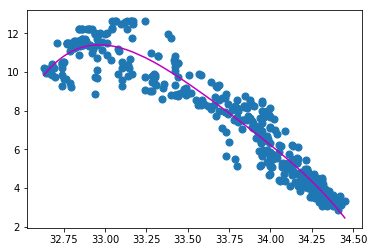

In [26]:
plt.scatter(X_train, y_train, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

# Start

In [27]:
bottle.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.136510,0.147493,-0.026749,...,0.005807,-0.040576,-0.161961,-0.604945,-0.036155,-0.097938,-0.075060,-0.115212,-0.262587,0.020778
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.134732,0.145498,-0.027514,...,0.009648,-0.035778,-0.161348,-0.595142,-0.035516,-0.097251,-0.074255,-0.114165,-0.259082,0.020315
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,...,-0.279636,-0.201450,0.999994,-0.018605,0.567855,0.572374,0.786873,0.866185,0.223304,-0.611798
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,...,0.108925,0.014987,-0.679852,0.006503,-0.936239,-0.949972,-0.742196,-0.889635,0.547436,0.743735
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,...,-0.029373,-0.003063,0.571405,-0.000758,0.938153,0.955942,0.895124,0.937147,0.583807,0.106417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIC2,-0.097938,-0.097251,0.572374,-0.949972,0.955942,-0.941214,0.965546,-0.962977,-0.941528,-0.958549,...,0.024819,0.220101,0.570633,-0.026912,0.991091,1.000000,0.885735,0.888669,NaN,NaN
TA1,-0.075060,-0.074255,0.786873,-0.742196,0.895124,-0.802493,0.779899,-0.788291,-0.802435,-0.737828,...,0.006186,-0.010690,0.785334,0.025613,0.853682,0.885735,1.000000,0.994924,0.616844,0.260047
TA2,-0.115212,-0.114165,0.866185,-0.889635,0.937147,-0.726460,0.887778,-0.767766,-0.727023,-0.828905,...,0.265152,0.235116,0.865140,0.020177,0.883278,0.888669,0.994924,1.000000,0.578090,0.577613
pH2,-0.262587,-0.259082,0.223304,0.547436,0.583807,0.174204,-0.480397,0.732628,0.180058,-0.457365,...,0.047099,0.049127,0.223304,-0.457365,NaN,NaN,0.616844,0.578090,1.000000,0.995913


In [28]:
bottle.corr()['T_degC'].sort_values(ascending=False).head(20)


T_degC         1.000000
R_TEMP         1.000000
R_POTEMP       0.999954
R_SVA          0.964171
O2Sat          0.850596
R_O2Sat        0.850365
R_O2           0.795700
O2ml_L         0.795700
Oxy_µmol/Kg    0.795543
BtlNum         0.750413
pH1            0.743735
pH2            0.547436
LightP         0.341392
T_qual         0.162308
NH3uM          0.132410
R_NH4          0.132263
R_CHLA         0.108925
ChlorA         0.108915
R_NO2          0.097463
NO2uM          0.097438
Name: T_degC, dtype: float64

In [95]:
bottle_df2 = bottle[:10000]     

In [96]:
bottle_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 74 columns):
Cst_Cnt                10000 non-null int64
Btl_Cnt                10000 non-null int64
Sta_ID                 10000 non-null object
Depth_ID               10000 non-null object
Depthm                 10000 non-null int64
T_degC                 9956 non-null float64
Salnty                 9758 non-null float64
O2ml_L                 7702 non-null float64
STheta                 9731 non-null float64
O2Sat                  7533 non-null float64
Oxy_µmol/Kg            7533 non-null float64
BtlNum                 0 non-null float64
RecInd                 10000 non-null int64
T_prec                 9956 non-null float64
T_qual                 103 non-null float64
S_prec                 9758 non-null float64
S_qual                 361 non-null float64
P_qual                 10000 non-null float64
O_qual                 2323 non-null float64
SThtaq                 442 non-null float64
O

In [112]:
bottle_df2 = bottle_df2[['T_degC','Salnty', 'Depthm','O2Sat']]

In [113]:
bottle_df2

,T_degC,Salnty,Depthm,O2Sat
0,10.50,33.440,0,NaN
1,10.46,33.440,8,NaN
2,10.46,33.437,10,NaN
3,10.45,33.420,19,NaN
4,10.45,33.421,20,NaN
...,...,...,...,...
9995,15.71,33.640,43,96.5
9996,15.35,33.621,50,92.3
9997,14.64,33.510,65,82.0
9998,14.04,33.459,75,80.8


In [114]:
print(bottle_df2.isnull().sum())

T_degC      44
Salnty     242
Depthm       0
O2Sat     2467
dtype: int64


In [115]:
bottle_df2_c = bottle_df2.dropna()

print(f"จำนวนข้อมูลที่เหลือหลังจาก Clean: {len(bottle_df2_c)}")

จำนวนข้อมูลที่เหลือหลังจาก Clean: 7533


In [102]:
bottle_df2_c.corr()['T_degC' ]

T_degC    1.000000
Salnty   -0.650284
Depthm   -0.831551
O2Sat     0.893025
Name: T_degC, dtype: float64

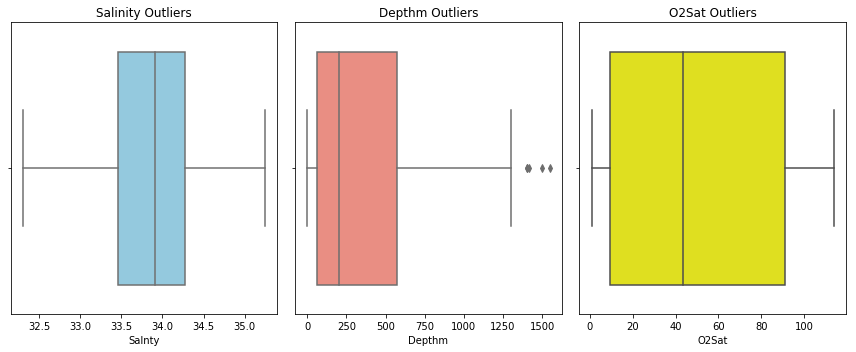

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้างพื้นที่สำหรับ 3 รูป (1 แถว 3 คอลัมน์)
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(ax=axes[0], x=bottle_df2_c['Salnty'], color='skyblue')
axes[0].set_title('Salinity Outliers')

sns.boxplot(ax=axes[1], x=bottle_df2_c['Depthm'], color='salmon')
axes[1].set_title('Depthm Outliers')

sns.boxplot(ax=axes[2], x=bottle_df2_c['O2Sat'], color='yellow')
axes[2].set_title('O2Sat Outliers')

plt.tight_layout()
plt.show()

In [109]:
# ฟังก์ชันช่วยลบ Outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # กรองเอาเฉพาะข้อมูลที่อยู่ในขอบเขต
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# ลบทีละตัวแปร
df2_cleaned = remove_outliers_iqr(bottle_df2_c, 'Salnty')
df2_cleaned = remove_outliers_iqr(df2_cleaned, 'Depthm') 
df2_cleaned = remove_outliers_iqr(df2_cleaned, 'O2Sat')
print(f"จาก {len(bottle_df2_c)} แถว เหลือ {len(df2_cleaned)} แถว")

จาก 7533 แถว เหลือ 7528 แถว


In [117]:
X2 = df2_cleaned[['Salnty', 'Depthm','O2Sat']]
y2 = df2_cleaned['T_degC']

In [118]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

## Linear Regression

In [149]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,r2_score

# เลือกใช้ตัวแปรเดียวที่มี Correlation สูงสุด (เช่น O2Sat)
X_train_simple = X_train[['O2Sat']]
X_test_simple = X_test[['O2Sat']]

# สร้างและฝึกสอน Model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

# ทำนายผลจาก Test Set ของ Model 1
y_pred_simple = simple_model.predict(X_test_simple)
y_train_pred_simple = simple_model.predict(X_train_simple)

# วัดผล (ใช้ชื่อตัวแปรเฉพาะของ simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# ทำนายและวัดผล
y_pred_simple = simple_model.predict(X_test_simple)
print(f"--- Simple Linear Regression (1 Variable) ---")
print(f"MSE Score for Test set: " +"{:.2}".format(mse_simple))
print(f"RMSE Score for Test set: " +"{:.2}".format(rmse_simple))
print(f"R2 Score for Test set: " +"{:.2}".format(r2_simple))

--- Simple Linear Regression (1 Variable) ---
MSE Score for Test set: 3.3
RMSE Score for Test set: 1.8
R2 Score for Test set: 0.8


## Multiple Linear Regression

In [153]:
# ใช้ตัวแปรทั้งหมด (Salnty, Depthm, O2Sat) แต่ยังไม่ทำ Polynomial
# ปรับขนาดข้อมูล (Scaling)
scaler_mlr = StandardScaler()
X_train_mlr_scaled = scaler_mlr.fit_transform(X_train)
X_test_mlr_scaled = scaler_mlr.transform(X_test)

# สร้างและฝึกสอน Model
mlr_model = Ridge(alpha=10) 
mlr_model.fit(X_train_mlr_scaled, y_train)

# ทำนายผลจาก Test Set ของ Model 1
y_pred_mlr = mlr_model.predict(X_test_mlr_scaled)
y_train_pred_mlr = mlr_model.predict(X_train_mlr_scaled)

# วัดผล (ใช้ชื่อตัวแปรเฉพาะของ simple)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

# ทำนายและวัดผล
print(f"--- Multiple Linear Regression ---")
print(f"MSE Score for Test set: " +"{:.2}".format(mse_mlr))
print(f"RMSE Score for Test set: " +"{:.2}".format(rmse_mlr))
print(f"R2 Score for Test set: " +"{:.2}".format(r2_mlr))

--- Multiple Linear Regression ---
MSE Score for Test set: 1.6
RMSE Score for Test set: 1.2
R2 Score for Test set: 0.91


## Polynomial Regression

In [155]:

# สร้างคอลัมน์เพิ่มด้วย Polynomial
poly_df = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_df.fit_transform(X_train)
X_test_poly = poly_df.transform(X_test)

# ปรับขนาดข้อมูล (Scaling) ให้ทุกตัวแปรเท่ากัน
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# สร้างและฝึกสอน Model
#linreg2 = LinearRegression()
poly_model = Ridge(alpha=10)
poly_model.fit(X_train_scaled, y_train)

# ทำนายผลจาก Test Set
y_pred_poly = poly_model.predict(X_test_scaled)
y_train_pred_poly = poly_model.predict(X_train_scaled)

# วัดผลความแม่นยำ
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"--- Polynomial Regression ---")
print(f"MSE Score for Test set: " +"{:.2}".format(mse_poly))
print(f"RMSE Score for Test set: " +"{:.2}".format(rmse_poly))
print(f"R2 Score for Test set: " +"{:.2}".format(r2_poly))

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
print(f"MSE train  Score for Train set: " +"{:.2}".format(mse_train_poly))
print(f"R2 train Score for Train set: " +"{:.2}".format(r2_train_poly))

--- Polynomial Regression ---
MSE Score for Test set: 1.2
RMSE Score for Test set: 1.1
R2 Score for Test set: 0.93
MSE train  Score for Train set: 1.2
R2 train Score for Train set: 0.92


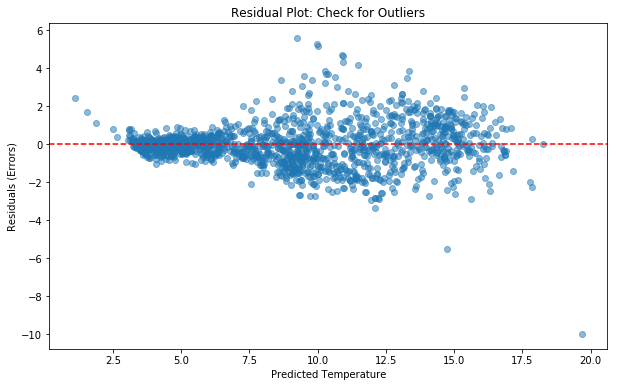

In [156]:
residuals = y_test - y_pred_poly

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_poly, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot: Check for Outliers')
plt.show()

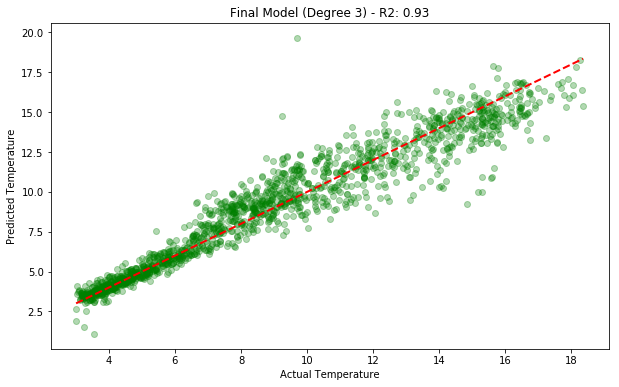

In [157]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title(f'Final Model (Degree 3) - R2: {r2:.2f}')
plt.show()

หลังจากทำ Model Tuning ด้วยการเพิ่ม Depthm, O2Sat และใช้ Polynomial Degree 3 ร่วมกับ Ridge (alpha=10) พบว่าโมเดลมีความแม่นยำสูงถึง 93% และมีค่า MSE ที่เสถียรทั้งชุดฝึกและชุดทดสอบ(1.2) ซึ่งช่วยป้องกันปัญหา Overfitting ได้ดีกว่าการใช้ Degree ที่สูงกว่านี้